# Problemática a resolver

Una tribu pacífica de la isla tiene un concurso legendario de jamones. El jurado es muy longevo y este año ha perdido a más de la mitad de sus miembros. La tribu te ha enviado una base de datos (score_de_jamonosidad.csv) de los últimos concursos. En esta base de datos se enlistan distintos especímenes de jamones con la calificación que el jurado otorgó a cada uno. También has recibido una base de datos de jamones no calificados (jamones_por_calificar.csv) que deberás calificar, honrando el espíritu del jurado.


Inicialmente se importan las librerias necesarias.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Exploración de los datos

In [35]:
# Carga de datasets y revisión de dataset de entrenamiento
df = pd.read_csv("score_de_jamonosidad.csv")
to_qualify = pd.read_csv("jamones_por_calificar.csv")
# El número de jamon no aporta información relevante para el entrenamiento, por lo tanto se elimina
df = df.drop("jamon", axis=1) 
print("Dataset de entrenamiento con",len(df),"muestras")
df.head(10)

Dataset de entrenamiento con 28 muestras


,score,v1,v2,v3
0,10,1985,59.7,2205
1,11,2855,55.0,2096
2,11,1737,65.6,1847
3,13,2905,61.4,1903
4,10,1666,66.1,1457
5,11,2927,61.0,1848
6,10,2341,66.1,1564
7,11,2737,58.9,2476
8,4,1414,57.0,2577
9,2,1838,58.9,2476


Para intentar descubrir qué valores de las 3 caracteristicas determinan que un jamon debe tener una nota alta, se observa que el mayor valor de score (13) es la cuarta muestra del dataset, por ende se grafica como se observa a continuación.

Resaltado en rojo los valores para un jamon con calificación de 13.0


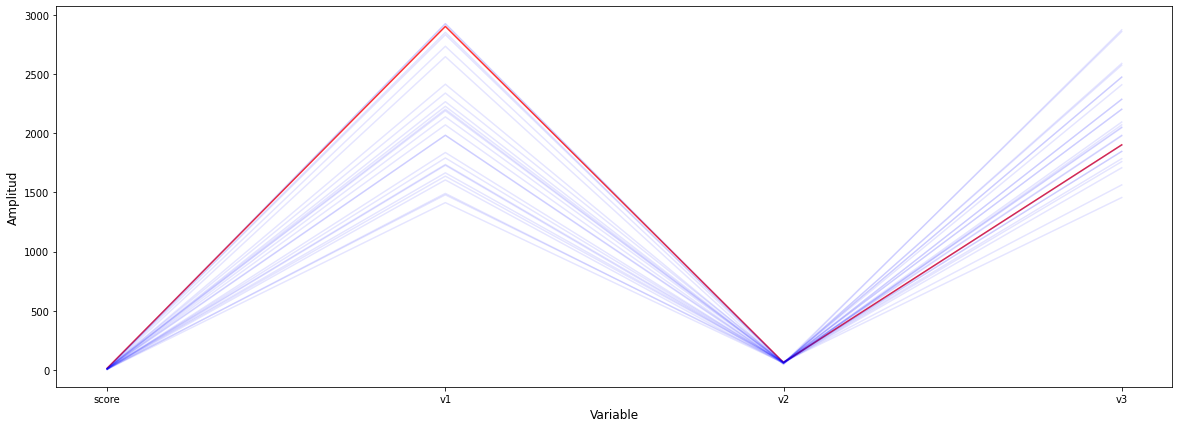

In [45]:
# Se grafica el dataset en bruto con los valores que son de interés para el modelo
def plot_raw_data(variables, x_label, y_label, df, target, maximun):
    plt.figure(figsize=(20,7), facecolor='w', edgecolor='k')
    for i in range(0, len(df)-1):
        plt.plot(df.iloc[i],alpha=0.8, color='red') if i == maximun else plt.plot(df.iloc[i],alpha=0.1, color='blue')
        if i == 3: # se imprime el score de la fila para verificar que se está resaltando a los valores correctos en la gráfica 
            print("Resaltado en rojo los valores para un jamon con calificación de",df.iloc[i]['score']) 
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
variables = ['score']
plot_raw_data(variables, "Variable", "Amplitud", df, to_qualify, 3)

En la figura de los datos en bruto se observa que a mayores valores de las variables v1 se tiene una mejor calificación, no es muy claro identificar el comportamiento en la variable 2 dado que los valores no poseen gran desviación estándar se podría asumir que es un valor no muy relevante para el entrenamiento, por otro lado se observa que el valor v3 debe ser un poco menor a 2000

# Creación del modelo de regresión

In [41]:
# se hace split a la data con un tamaño de test de 33%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("error absoluto medio (mae):", mae)
print("error medio cuadrado (mse):", mse)
x_test = to_qualify[['v1', 'v2', 'v3']]
y_pred = linear_model.predict(x_test)
to_qualify['score'] = y_pred
to_qualify.to_csv("jamones_por_calificar.csv", index=False)
to_qualify.head(11)

error absoluto medio (mae): 1.58480345859139
error medio cuadrado (mse): 3.765971949818703


,jamon,score,v1,v2,v3
0,29,9.002484,2383,59,1857
1,30,3.167275,1598,61,2696
2,31,13.576961,2883,67,1865
3,32,7.390965,2898,56,2822
4,33,8.039712,2877,44,1553
5,34,3.220463,1966,55,2683
6,35,5.047018,1786,66,2823
7,36,11.021843,2813,63,2199
8,37,8.259230,2882,52,2187
9,38,9.555584,2859,49,1498


Resaltado en rojo los valores para un jamon con calificación de 7.390965335602871


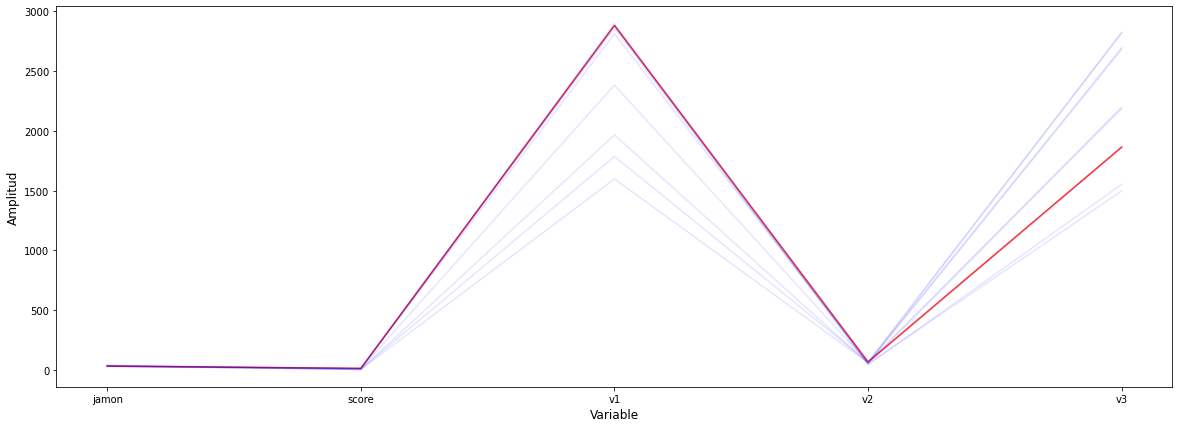

In [47]:
plot_raw_data(variables, "Variable", "Amplitud", to_qualify, to_qualify, 2)